<a href="https://colab.research.google.com/github/feracor/estadistica_descriptiva/blob/main/2_estadistica_en_ingesta_de_datos.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Procesamiento de datos numéricos

In [3]:
import timeit #Medir el performance de los modelos
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import datasets, linear_model #Descargar datasets y permir hacer uso de regresión lineal sencilla

X, y = datasets.load_diabetes(return_X_y=True) #Cargar dataset
raw = X[:, None, 2] #Realizar función de tranformación

##min-max

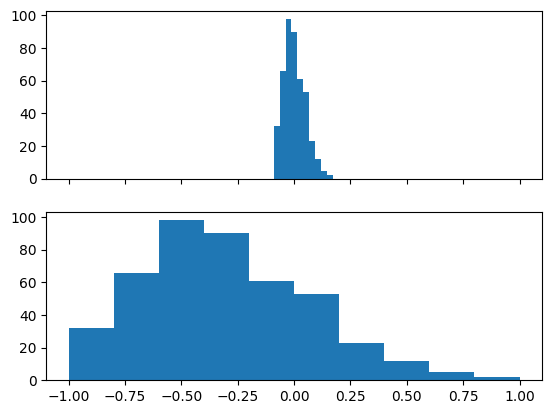

In [7]:
max_raw = max(raw)
min_raw = min(raw)
scaled = ((2*raw - min_raw -max_raw)/(max_raw-min_raw))

fig, axs = plt.subplots(nrows=2, ncols=1, sharex=True)
axs[0].hist(raw) #Histograma datos raw
axs[1].hist(scaled) #Histograma datos escalados

plt.show()

In [11]:
#Modelo para entrenamiento

# Medir el entrenamiento sobre los datos raw
def train_raw():
  linear_model.LinearRegression().fit(raw, y) #Toma métodos de sklearn. Se ajusta a los datos raw y a una variable y declarada en la primer celda al cargar el dataset

# Medir el entrenamiento sobre los datos escalados
def train_scaled():
  linear_model.LinearRegression().fit(scaled, y)


In [13]:
raw_time = timeit.timeit(train_raw, number=100) #Calcula el tiempo con 100 ciclos
scaled_time = timeit.timeit(train_scaled, number=100)
print('train raw : {}'.format(raw_time))
print('train scaled : {}'.format(scaled_time)) #Evidenciar reduccion en el tiempo de ejecución

train raw : 0.17292266499998732
train scaled : 0.10518396500015115
